# Fourier Transform

#### Problem 1.

In this problem, given an image we perform the following tasks:
1. Compute its Fourier Transform 
2. Try to reconstruct the image by applying Inverse Fourier Transform to the Fourier Image.
3. Inspect the changes in image due to above operations.

Let us begin by first importing the necessary libraries and defining a few helper functions, before we approach the solutions.

In [2]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import cmath

The above libraries are necessary for reading image, performing array and matrix operations, visualising the output plots and for handling complex numbers generated by the fourier transform.

Next, we shall define all the necessary functions for solving the given problem.

In [3]:
# Function to perform 2-D Discrete Fourier transform on a given image(matrix) of size M x N.
def two_dim_fourier_transform(img):
    M, N = img.shape[:2]
    dft_rep = [[0.0 for k in range(M)] for l in range(N)]
    for k in range(M):
        for l in range(N):
            temp_sum = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(- 1j * 2 * cmath.pi * (float(k * m) / M + float(l * n) / N))
                    temp_sum += img[m][n] * e
            dft_rep[l][k] = temp_sum
    return dft_rep

In [4]:
# Function to perform 2-D Inverse Fourier Transform on a given Fourier image matrix.
def two_dim_inv_fourier_transform(fourier):
    M = len(fourier)
    N = len(fourier[0])
    idft_rep = [[0.0 for k in range(M)] for l in range(N)]
    for k in range(M):
        for l in range(N):
            temp_sum = 0.0
            for m in range(M):
                for n in range(N):
                    e = cmath.exp(1j * 2 * cmath.pi * (float(k * m) / M + float(l * n) / N))
                    temp_sum += fourier[m][n] * e
            idft_rep[l][k] = temp_sum/(M*N)
    return idft_rep

In [5]:
# Function to centre the obtained Fourier transform image. Since Fourier transform is periodic, we can represent 
# by relocating the centre of the image for better representation.(Analogous to fftshift)
def img_preprocess_centred_fourier(img):
    M, N = img.shape[:2]
    processed_img = np.zeros((M,N))
    for x in range(M/2):
        for y in range(N/2):
            processed_img[x][y] = img[M/2 + x][N/2 + y]
    for x in range(M/2+1, M):
        for y in range(N/2+1, N):
            processed_img[x][y] = img[x - M/2 ][y - N/2]
    for x in range(M/2+1, M):
        for y in range(N/2):
            processed_img[x][y] = img[x - M/2][y + N/2]
    for x in range(M/2):
        for y in range(N/2+1, N/2):
            processed_img[x][y] = img[x + M/2][y - N/2]
    return processed_img

In [18]:
# If we have an odd sized image, we convert it into an even sized image.
def preprocess_odd_images(img):
    M, N = img.shape[:2]
    if M % 2 == 1 and N % 2 == 1:
        return img[1:][1:]
    elif M%2 == 1:
        return img[1:][:]
    elif N%2 == 1:
        return img[:][1:]
    else:
        return img

In [6]:
# Function to plot a labeled image
def plot_input(img, title):
    plt.imshow(img, cmap = 'gray')
    plt.title(title), plt.xticks([]), plt.yticks([])
    plt.show()

In [7]:
# Function to compute the Mean Squared Error between two input matrices.
def min_sqr_err(mat1, mat2):
    min_sq = 0
    M, N = mat1.shape[:2]
    for i in range(M):
        for j in range(N):
            min_sq += np.square(mat1[i][j] - mat2[i][j])
    return min_sq

Let us begin the solution by loading an input image. Since the computation of Fourier transform is extremely memory intensive, we choose a very small image (40 x 40 pixels) as input testing image.

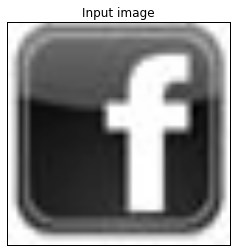

In [19]:
img = cv2.imread('./fb_test.jpg', 0)
img = preprocess_odd_images(img)
plot_input(img,'Input image')

In [9]:
# Details of the input image
M, N = img.shape[:2]
print M,N

40 40


## Part A.
### Computing Fourier Transform

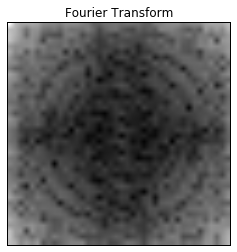

In [20]:
processed_img = img_preprocess_centred_fourier(img)
dft_rep = two_dim_fourier_transform(img)
centred_dft_rep = two_dim_fourier_transform(processed_img)

# Visualizing the Fourier Transform in Logarithmic Scale
plot_input(10*np.log(1+np.abs(centred_dft_rep)), 'Fourier Transform') 

As we see, above is the fourier transform of the input image.

Now let us try and see if we can reconstruct the original image, by performing Inverse fourier transform on the above obtained image in the Fourier domain.

## Part B.
### Inverse Fourier Transform

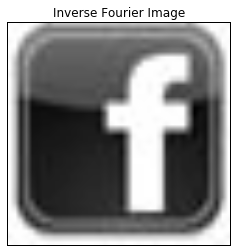

In [16]:
idft_rep = two_dim_inv_fourier_transform(dft_rep)
plot_input(np.abs(idft_rep), 'Inverse Fourier Image')

As we see, the image obtained by performing the inverse fourier transform of the obtained fourier image, is very similar to the input image. 

But let us compute the Mean Squared Error(MSE) between the original image and the reconstructed image, to verify that the images are identical or not.

## Part C.
### Computing the Mean Squared Error(MSE)

In [17]:
min_sq_error = min_sqr_err(img, np.abs(idft_rep))
print "Mean squared Error between the reconstructed and original image: ", min_sq_error

Mean squared Error between the reconstructed and original image:  5.2902507732e-21


The error is extremely negligible, of the magnitude of 10^(-21) ~ Zero.

## Part D
### Conclusion

1. According to the Parseval's equation, the energy or the information contained in the signal is reserved, i.e.,the signal is represented equivalently in either the time or frequency domain with no energy gained or lost.
2. Hence, ideally we must get the Mean Squared Error = 0. 
3. As we are considering the magnitudes of the complex numbers, there are errors generated in rounding up and square root calculation etc., because of which we obtained a non zero error.